In [97]:
import gym
env = gym.make("CliffWalking-v0")
env.reset()
env.render()

/home/linaro/anaconda3/lib/python3.9/site-packages/gym/envs/toy_text/cliffwalking.py:167: UserWarning: WARN: You are calling render method without specifying any render mode. You can specify the render_mode at initialization, e.g. gym("CliffWalking-v0", render_mode="rgb_array")
  logger.warn(


In [98]:
import numpy as np
position = np.unravel_index(0, env.shape)
position

(0, 0)

In [99]:
np.unravel_index(env.P[0][3][0][1], env.shape)

(0, 0)

In [100]:
env.P[0][2][0][1]

12

In [101]:
env.P[46]

{0: [(1.0, 34, -1, False)],
 1: [(1.0, 47, -1, True)],
 2: [(1.0, 36, -100, False)],
 3: [(1.0, 36, -100, False)]}

In [102]:
#env.P

In [103]:
import numpy as np
n_states = len(env.P)
V = np.zeros(n_states)
policy = np.zeros(n_states)
#V[47] = 0
gamma = 0.9
delta = 1e-8

tst = []
while True:
    # policy evaluation
    vvs = []
    print(V.reshape((4,12)))
    print(policy.reshape((4,12)))
    tst.append(np.sum(V))
    while True:
        old_value = V.copy()
        for state in range(len(env.P)):
            vals = []
            v = env.P[state][policy[state]]
            s_prime = v[0][1]
            reward = v[0][2]
            terminal = v[0][3]
            V[state] = reward + (1-terminal)*gamma*V[s_prime]
            #print(V)

        if np.abs(V - old_value).max() <= delta:
            break

    # update policy
    new_policy = np.zeros(n_states)
    for state in range(len(env.P)):
        vals = []
        for k, v in env.P[state].items():
            s_prime = v[0][1]
            reward = v[0][2]
            terminal = v[0][3]
            vals.append(reward + (1-terminal)*gamma*V[s_prime])
        new_policy[state] = np.argmax(vals)

    if np.array_equal(new_policy, policy):
        break
    else:
        policy = new_policy


print(V.reshape((4,12)))
print(policy.reshape((4,12)))



[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[-9.99999991 -9.99999991 -9.99999991 -9.99999991 -9.99999991 -9.99999991
  -9.99999991 -9.99999991 -9.99999991 -9.99999991 -9.99999991 -9.99999991]
 [-9.99999992 -9.99999992 -9.99999992 -9.99999992 -9.99999992 -9.99999992
  -9.99999992 -9.99999992 -9.99999992 -9.99999992 -9.99999992 -9.99999992]
 [-9.99999993 -9.99999993 -9.99999993 -9.99999993 -9.99999993 -9.99999993
  -9.99999993 -9.99999993 -9.99999993 -9.99999993 -9.99999993 -9.99999993]
 [-9.99999994 -9.99999994 -9.99999994 -9.99999994 -9.99999994 -9.99999994
  -9.99999994 -9.99999994 -9.99999994 -9.99999994 -9.99999994 -9.99999994]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 

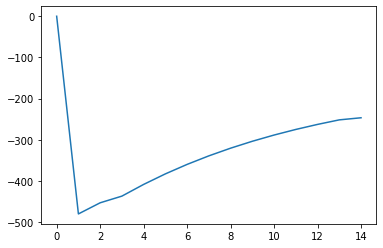

In [104]:
import matplotlib.pyplot as plt
plt.plot(tst)

In [105]:
import numpy as np

n_states = len(env.P)
V = np.zeros(n_states)
policy = np.zeros(n_states)
#V[47] = 0
gamma = 0.9
delta = 0.000001
tst = []
while True:
    old_value = V.copy()
    tst.append(np.sum(V))
    print(V.reshape((4,12)))
    print(policy.reshape((4,12)))
    for state in range(len(env.P)):
        vals = []
        for k, v in env.P[state].items():
            s_prime = v[0][1]
            reward = v[0][2]
            terminal = v[0][3]
            vals.append(reward + (1-terminal)*gamma*V[s_prime])
        V[state] = np.max(vals)
        policy[state] = np.argmax(vals)
    if np.abs(V - old_value).max() <= delta:
        break

print(V.reshape((4,12)))
print(policy.reshape((4,12)))

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[-1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1. ]
 [-1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1. ]
 [-1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1. ]
 [-1.  -1.9 -1.9 -1.9 -1.9 -1.9 -1.9 -1.9 -1.9 -1.9 -1.  -1. ]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.]]
[[-1.9  -1.9  -1.9  -1.9  -1.9  -1.9  -1.9  -1.9  -1.9  -1.9  -1.9  -1.9 ]
 [-1.9  -1.9  -1.9  -1.9  -1.9  -1.9  -1.9  -1.9  -1.9  -1.9  -1.9  -1.9 ]
 [-1.9  -1.9  -1.9  -1.9  -1.9  -1.9  -1.9  -1.9  -1.9  -1.9  -1.9  -1.  ]
 [-1.9  -2.71 -2.71 -2.71 -2.71 -2.71 -2.71 -2.71 -

KeyboardInterrupt: 

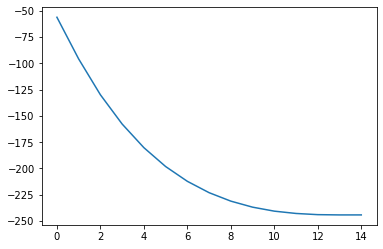

In [ ]:
import matplotlib.pyplot as plt
plt.plot(tst)

In [114]:
alpha = 0.5
eps = 0.1
n_states = len(env.P)
n_actions = 4
Q = np.zeros((n_states, n_actions)) + 0
Q[47, :] = 0
n_episodes = 500
env = gym.make("CliffWalking-v0")
rewards_sarsa = []
gamma = 0.9
for e in range(n_episodes):
    sum_rew = 0
    #eps -= 0.005
    obs, _ = env.reset()
    if np.random.rand() < eps:
        a = env.action_space.sample()
    else:
        a = np.argmax(Q[obs])
    timesteps = 0
    while True:
        new_obs, reward, te, tr, prob = env.step(a)
        if np.random.rand() < eps:
            a_new = env.action_space.sample()
        else:
            a_new = np.argmax(Q[new_obs])
        Q[obs, a] += alpha*(reward + gamma*Q[new_obs, a_new] - Q[obs, a])
        sum_rew += reward
        obs = new_obs
        a = a_new
        timesteps += 1
        if te or tr or timesteps > 100:
            break
        #if te or tr:
            #break
    rewards_sarsa.append(sum_rew)
    V = np.zeros(n_states)
    policy = np.zeros(n_states)
    i = 0
    for s in Q:
        V[i] = np.max(s)
        policy[i] = np.argmax(s)
        i += 1

    print(V.reshape((4,12)))
    print(policy.reshape((4,12)))




[[ 0.     -0.5     0.      0.      0.      0.      0.      0.      0.
  -0.5    -0.8375 -0.75  ]
 [ 0.      0.      0.      0.      0.      0.      0.      0.      0.
   0.     -0.5    -0.5   ]
 [ 0.      0.      0.      0.      0.      0.      0.      0.      0.
   0.      0.      0.    ]
 [ 0.      0.      0.      0.      0.      0.      0.      0.      0.
   0.      0.      0.    ]]
[[3. 1. 2. 2. 2. 3. 2. 2. 3. 2. 3. 0.]
 [2. 2. 1. 0. 0. 1. 0. 0. 1. 2. 3. 2.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 3.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[-0.5        -0.5        -0.75       -0.5         0.          0.
   0.          0.          0.         -0.5        -0.8375     -0.75      ]
 [-0.725      -0.5        -0.5        -0.5        -0.5        -0.5
  -0.5        -0.5        -0.5        -0.5        -0.5        -0.5       ]
 [-0.75        0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.         -0.5       ]
 [-1.42242187  0.          0. 

In [115]:
alpha = 0.5
eps = 0.1
n_states = len(env.P)
n_actions = 4
Q = np.zeros((n_states, n_actions)) + 0
Q[47, :] = 0
n_episodes = 500
env = gym.make("CliffWalking-v0")
rewards_qlearning = []
gamma = 0.9
for e in range(n_episodes):
    sum_rew = 0
    timesteps = 0
    obs, _ = env.reset()
    while True:
        if np.random.rand() < eps:
            a = env.action_space.sample()
        else:
            a = np.argmax(Q[obs])
        new_obs, reward, te, tr, prob = env.step(a)
        Q[obs, a] += alpha*(reward + gamma*np.argmax(Q[new_obs]) - Q[obs, a])
        sum_rew += reward
        obs = new_obs
        timesteps += 1
        if te or tr or timesteps > 100:
            break
        #if te or tr:
            #break
    rewards_qlearning.append(sum_rew)
    V = np.zeros(n_states)
    policy = np.zeros(n_states)
    i = 0
    for s in Q:
        V[i] = np.max(s)
        policy[i] = np.argmax(s)
        i += 1

    print(V.reshape((4,12)))
    print(policy.reshape((4,12)))



[[1.7   1.05  1.275 0.4   0.4   0.85  0.4   0.4   0.4   0.85  0.4   0.4  ]
 [0.    0.    1.275 0.85  0.    0.85  0.85  0.85  0.    0.85  0.85  0.85 ]
 [0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   ]]
[[3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.]
 [3. 2. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[1.7        1.05       1.275      0.4        0.4        0.85
  0.4        0.4        0.4        0.85       0.4        0.4       ]
 [1.69999919 1.59375    1.275      0.85       0.         0.85
  0.85       0.85       0.         0.85       0.85       0.85      ]
 [0.4        1.05       0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.        ]
 [0.79999999 0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.        ]]
[[3. 3. 3. 3. 3. 3. 3

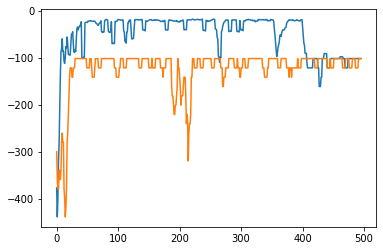

In [122]:
plt.plot(np.convolve(rewards_sarsa, np.ones(5)/5, mode="valid"))
plt.plot(np.convolve(rewards_qlearning, np.ones(5)/5, mode="valid"))